In [10]:
# https://qiita.com/Saku731/items/7f444e1312b85996842f
# 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# トレーニング用データ読み込み
df = pd.read_csv('./train.csv')

# データチラ見
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 変数の説明
|Variable|Definition|Key|
|--|--|--|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

In [12]:
# 説明変数の概要を調べる
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# データの欠損有無
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# 欠損値処理
# 平均値をセットする
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

# カテゴリ変数の変換
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# 不要な変数削除
df = df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)


In [15]:
# 説明変数の相関を調べる
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


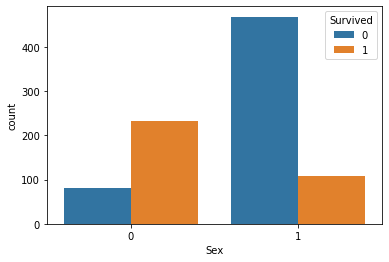

In [16]:
# データ可視化
sns.countplot('Sex',hue='Survived',data=df)

In [17]:
# https://www.randpy.tokyo/entry/python_random_forest
from sklearn.model_selection import train_test_split

# 説明変数(train_X)と結果に分割(train_y)
train_X = df.drop('Survived', axis=1)
train_y = df.Survived

# トレーニングデータとテストデータ（精度計測用）に分割
# https://docs.pyq.jp/python/machine_learning/tips/train_test_split.html
# test_size: テストデータのサイズ。トレーニングデータのサイズは1-テストデータのサイズ
# random_state: 乱数発生のシード。未指定の場合にはnp.randomが用いられる
(train_X, test_X ,train_y, test_y) = train_test_split(train_X, train_y, test_size = 0.3, random_state = 666)


In [18]:
# ランダムフォレスト
# https://ja.wikipedia.org/wiki/%E3%83%A9%E3%83%B3%E3%83%80%E3%83%A0%E3%83%95%E3%82%A9%E3%83%AC%E3%82%B9%E3%83%88
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)

# 精度計算
from sklearn.metrics import (roc_curve, auc, accuracy_score)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

0.8208955223880597

In [19]:
# 特徴量の影響度
fti = clf.feature_importances_ 
print('Pclass, Sex, Age, SibSp, Parch, Fare, Embarked')
print(fti)

Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
[0.08732272 0.25621968 0.26208944 0.05601407 0.04206606 0.26056538
 0.03572264]


### 参考
* [タイタニック号の乗客の生存予測〜80%以上の予測精度を超える方法（探索的データ解析編） \| キヨシの命題](https://yolo-kiyoshi.com/2018/12/16/post-951/)